In [2]:
import pandas as pd

# 1. read the csv file
acc_raw = pd.read_csv('acc_players-2324F.csv',encoding='latin1', header = None)
print(acc_raw.head())

acc_raw.columns = acc_raw.iloc[1]
acc_df = acc_raw.drop([0, 1]).reset_index(drop=True)
numeric_columns = ['G', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'PER', 'WS', 'BPM']
acc_df[numeric_columns] = acc_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print("\nACC Basketball 23-24 season:")
print(acc_df.head(5))
print(acc_raw.columns)

    0              1      2    3               4       5    6    7    8    9   \
0  NaN            NaN    NaN  NaN             NaN  Totals  NaN  NaN  NaN  NaN   
1   Rk         Player  Class  Pos          School       G   MP  TRB  AST  STL   
2    1   Amaree Abram     SO    G    Georgia Tech      10  108   17   11    1   
3    2   Sola Adebisi     FR    F   Florida State       7    9    1    1    0   
4    3  Prince Aligbe     SO    F  Boston College      35  651  119   21   15   

   ...   11   12   13        14     15     16     17        18    19    20  
0  ...  NaN  NaN  NaN  Shooting    NaN    NaN    NaN  Advanced   NaN   NaN  
1  ...  TOV   PF  PTS       FG%    2P%    3P%    FT%       PER    WS   BPM  
2  ...    9   10   34     0.262  0.318    0.2  0.615       4.1  -0.1  -6.4  
3  ...    1    1    2       0.5    0.5    NaN    NaN       3.5     0  -6.7  
4  ...   30   51  164     0.435  0.522  0.147   0.62       9.4   0.9  -1.3  

[5 rows x 21 columns]

ACC Basketball 23-24 season

In [4]:
# 2. Basic analysis

# total points scored by all players combined
total_points = acc_df['PTS'].sum()
print("Total points scored by all players combined:")
display(total_points)

# player who has played the most minutes
most_mp = acc_df[['Player','MP']].sort_values(by='MP', ascending = False).head(1)
print("\nPlayer who has played the most minutes: ")
display(most_mp)

#top 5 players in terms of total rebounds
top5_rb = acc_df[['Player', 'TRB']].sort_values(by = 'TRB', ascending = False).head(5)
print("\nTop 5 players in terms of total rebounds (TRB):")
print(top5_rb)

Total points scored by all players combined:


38411


Player who has played the most minutes: 


1,Player,MP
135,Casey Morsell,1333



Top 5 players in terms of total rebounds (TRB):
1             Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309


In [5]:
# 3. Player filtering 

filtered_df = acc_df[acc_df['MP'] > 500]

# player with the highest total assists
highest_assist = filtered_df[['Player','AST']].sort_values(by='AST', ascending = False).head(1)
print("\nPlayer with the highest assists: ")
display(highest_assist)

# top 3 Assists

top3_assist = filtered_df[['Player','AST']].sort_values(by='AST', ascending = False).head(3)
print("\nTop 3 Assist Leads in the League:")
print(top3_assist)

# top 3 Shot Blockers

top3_shot_blockers = filtered_df[['Player','BLK']].sort_values(by='BLK', ascending = False).head(3)
print("\nTop 3 Shot Blockers in the League:")
print(top3_shot_blockers)


Player with the highest assists: 


1,Player,AST
7,Reece Beekman,212



Top 3 Assist Leads in the League:
1            Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150

Top 3 Shot Blockers in the League:
1           Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


In [6]:
# 4. School-Based Analysis

#total points by school
points_school = acc_df.groupby('School')[['PTS']].sum().reset_index().sort_values(by = 'PTS', ascending = False)
print("\nTotal points by each school")
print(points_school)

#total assist for each team
total_assists_school = acc_df.groupby('School')['AST'].sum().reset_index().sort_values(by='AST', ascending=False)
print("\nTotal assists for each team:")
print(total_assists_school)

#top 3 schools score
top_3_schools = points_school.head(3)
print("\nTop 3 schools by total points scored:")
print(top_3_schools)



Total points by each school
1           School   PTS
7         NC State  3101
8   North Carolina  3032
2             Duke  2830
1          Clemson  2785
14     Wake Forest  2733
0   Boston College  2667
13   Virginia Tech  2547
3    Florida State  2526
10      Pittsburgh  2495
11        Syracuse  2442
6       Miami (FL)  2424
5       Louisville  2304
4     Georgia Tech  2272
12        Virginia  2140
9       Notre Dame  2113

Total assists for each team:
            School  AST
2             Duke  551
7         NC State  536
8   North Carolina  536
1          Clemson  533
13   Virginia Tech  514
0   Boston College  509
12        Virginia  509
6       Miami (FL)  454
10      Pittsburgh  452
11        Syracuse  442
14     Wake Forest  429
4     Georgia Tech  425
3    Florida State  406
5       Louisville  356
9       Notre Dame  335

Top 3 schools by total points scored:
1          School   PTS
7        NC State  3101
8  North Carolina  3032
2            Duke  2830


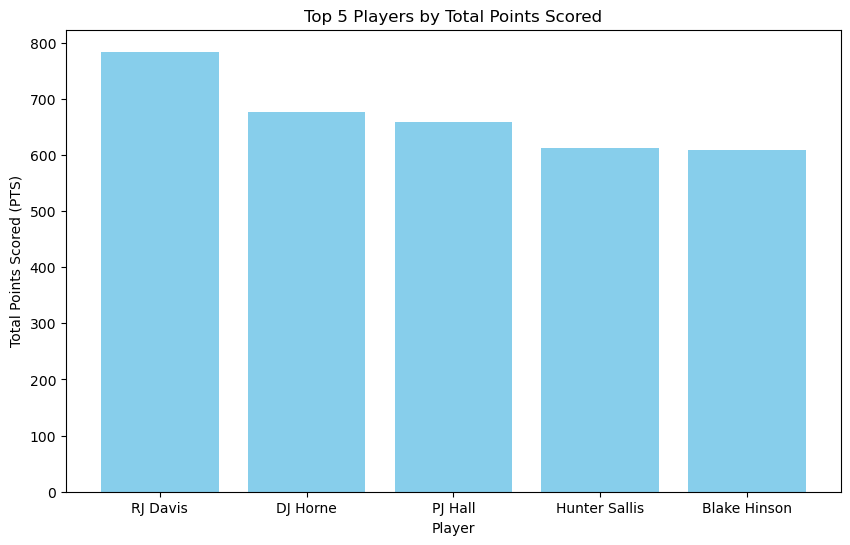

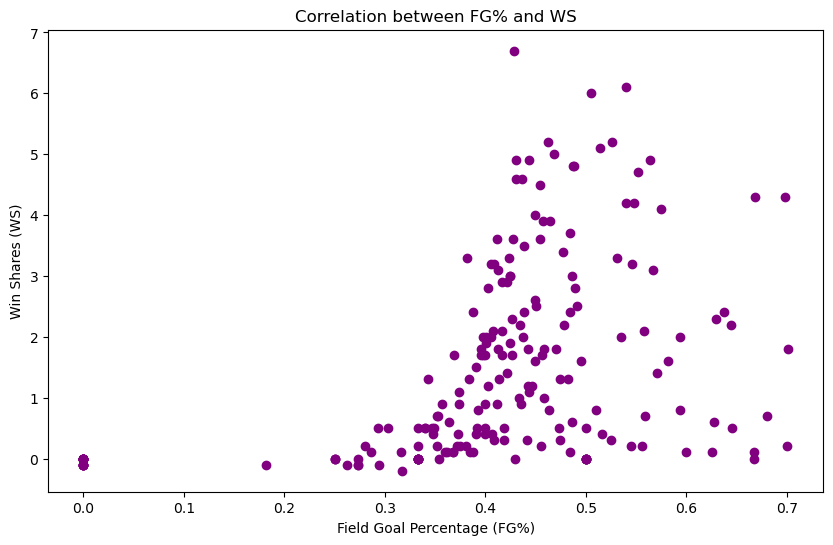

Correlation coefficient between FG% and WS: 0.421066389419978


In [8]:
# 5. Extra Credit
import matplotlib.pyplot as plt

# bar chart
top_5_scorers = acc_df[['Player', 'PTS']].sort_values(by='PTS', ascending = False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_scorers['Player'], top_5_scorers['PTS'], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Total Points Scored (PTS)')
plt.title('Top 5 Players by Total Points Scored')
plt.show()

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(acc_df['FG%'], acc_df['WS'], color='purple')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.title('Correlation between FG% and WS')
plt.show()

# correlation
correlation_coeff = acc_df['FG%'].corr(acc_df['WS'])
print(f"Correlation coefficient between FG% and WS: {correlation_coeff}")

# Refelction:

Working with csv files and panda data frames has made me more confident with my data manipulation skills. During this assignment, I learned several key skills such as reading data from csv file to panda, filtering rows based on specific conditions, particularly based on sorting a specific column, and manipulating data to get meaningful insights. Furthermore,  I also learned how to visualize data using matplotlib to create informative charts and scatter plots. These skills are applicable to a wide range of data analysis projects, allowing me to handle diverse datasets, clean them, and perform both descriptive and inferential analyses. 

The most challenging aspect of this assignment was getting the dataset itself to work. It was formatted in a weird way with all the columns in the first row and the header itself having only 3 names. This dataset had an unusual structure which made it difficult to directly apply standard panda functions. I had to search and teach myself about multiple-header rows and how to navigate them. To ensure that the correct columns were being used for analysis, I inspected the raw data, identified the correct header row, and dropped the unnecessary rows to clean the dataframe. This allowed me to transform the data into a usable format. Also, I realized the columns were not the correct data types (string and not integer) when I performed the first analysis so careful attention to these was required to ensure accuracy.

The skills and insights gained from this assignment can be applied to various other real-world datasets across different fields. For instance, in business, similar techniques can be used to analyze sales data, customer behavior, or financial performance. In healthcare, these skills can help in examining patient records and identifying patterns in medical data. The ability to analyze datasets, draw meaningful conclusions, and effectively communicate the results through visualizations is important in every field to make data-driven decisions. 